<a href="https://colab.research.google.com/github/mehdi-nait/Heart-Failure-Symptomes-detection/blob/master/Segmentation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info

This is an attempt to train a semantic segmentation model that aims to get the left ventricule segment from a whome MRI image, in this context, we're using the [Sunnybrook cardiac atlas project dataset](http://www.cardiacatlas.org/studies/sunnybrook-cardiac-data/).

for the sake of simplicity, we're using a pre-cleaned dataset, found on github, since in the last release, the filenames of the original dataset didn't make much sens.









# Github dataset 1

https://github.com/mshunshin/SegNetCMR.git

In [ ]:
!git clone https://github.com/mshunshin/SegNetCMR.git

Cloning into 'SegNetCMR'...
remote: Enumerating objects: 1760, done.
remote: Total 1760 (delta 0), reused 0 (delta 0), pack-reused 1760
Receiving objects: 100% (1760/1760), 32.87 MiB | 24.54 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [ ]:
cp -r SegNetCMR/Data/ Dataset

In [ ]:
rm -rf SegNetCMR

In [ ]:
cd Dataset

/content/Dataset


In [ ]:
!mv Test/Images/Sunnybrook_Part3/*.png Test/Images
!rm -r Test/Images/Sunnybrook_Part3

!mv Test/Labels/Sunnybrook_Part3/*.png Test/Labels
!rm -r Test/Labels/Sunnybrook_Part3

!mv Train/Images/Sunnybrook_Part1/*.png Train/Images
!rm -r Train/Images/Sunnybrook_Part1

!mv Train/Images/Sunnybrook_Part2/*.png Train/Images
!rm -r Train/Images/Sunnybrook_Part2

!mv Train/Labels/Sunnybrook_Part1/*.png Train/Labels
!rm -r Train/Labels/Sunnybrook_Part1

!mv Train/Labels/Sunnybrook_Part2/*.png Train/Labels
!rm -r Train/Labels/Sunnybrook_Part2

In [ ]:
cd Dataset/

/content/Dataset


In [ ]:
import os

train_images = os.listdir("Train/Images/")
print("number of images in the training dataset : {} image".format(len(train_images)))
test_images = os.listdir("Test/Images/")
print("number of images in the Testing dataset : {} image".format(len(test_images)))

number of images in the training dataset : 526 image
number of images in the Testing dataset : 279 image


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
import numpy as np
import random


train_images = os.listdir("Train/Images")
train_labels = os.listdir("Train/Labels")

def show_train(num):
  """given a number from 0-525, this functions shows the corresponding image and
  its mask"""
  if num>(len(train_images)-1) or num<0:
    raise Exception("error! index out of bound")
    
  
  image = cv2.imread("Train/Images/{}".format(train_images[num]))
  label = cv2.imread("Train/Labels/{}".format(train_labels[num]))

  height, width, channels = label.shape
  bg = np.zeros((height,width,3), np.uint8)
  bg[:]=(0,255,255)

  label_colored=np.bitwise_and(label,bg)

  product = cv2.bitwise_xor(image,label_colored)
  cv2_imshow(image)
  cv2_imshow(label)

  

  cv2_imshow(product)



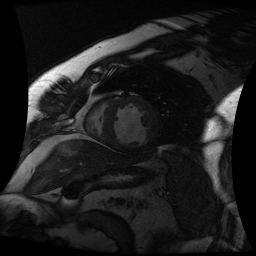

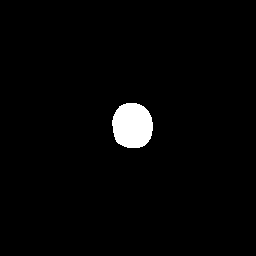

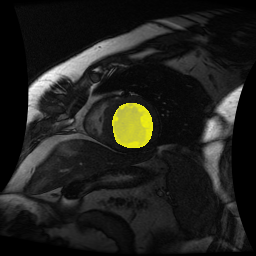

In [ ]:
show_train(random.randint(0, 525))

# Github dataset 2

In [ ]:
cd ..

/content


In [ ]:
!git clone https://github.com/woshialex/diagnose-heart.git

Cloning into 'diagnose-heart'...
remote: Enumerating objects: 2004, done.
remote: Total 2004 (delta 0), reused 0 (delta 0), pack-reused 2004
Receiving objects: 100% (2004/2004), 18.65 MiB | 29.11 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [ ]:
mv diagnose-heart/manual_data/ Dataset2

In [ ]:
rm -rf diagnose-heart/

In [2]:
cd Dataset2/

/content/Dataset2


In [49]:
import os
import cv2
from google.colab.patches import cv2_imshow
import random


manual_images = "manual_contours/images"
manual_contours = "manual_contours/contours"

images = os.listdir(manual_images)
contours = os.listdir(manual_contours)

images = sorted(images)
contours = sorted(contours)

def show_train2(num):
  """given an index from 0-128, the function shows the mask and ground truth
  """

  print("showing mask and image for {}".format(num))
  if num<0 or num>len(contours)-1:
    raise Exception("error! index out of bounds!")
    
  
  image = cv2.imread("{}/{}".format(manual_images,images[num]))
  mask  = cv2.imread("{}/{}".format(manual_contours,images[num]))

  height, width, channels = mask.shape
  bg = np.zeros((height,width,3), np.uint8)
  bg[:]=(255,255,255)

  mask = np.bitwise_xor(bg,mask)
  
  bg[:]=(0,255,255)

  mask_colored = np.bitwise_and(mask,bg)

  product = cv2.bitwise_xor(image,mask_colored)
  
  cv2_imshow(image)
  cv2_imshow(mask)
  cv2_imshow(product)



showing mask and image for 95


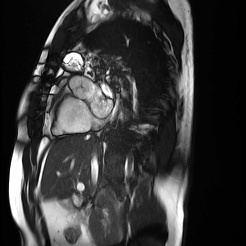

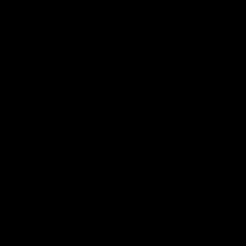

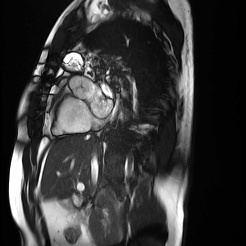

In [69]:
show_train2(95)

In [76]:
#indexes with empty mask images to be created manually 

empty_idx=[]

for i in range(0,128):
  mask = cv2.imread("{}/{}".format(manual_contours,contours[i]))
  if np.ndarray.min(mask)==255:
    empty_idx.append(i)

empty_names = [contours[i] for i in empty_idx]
print(empty_names)

['251_0012_manual.jpg', '429_0006_manual.jpg', '429_0013_manual.jpg', '429_0020_manual.jpg', '429_0027_manual.jpg', '429_0307_manual.jpg', '429_0314_manual.jpg', '429_0321_manual.jpg', '429_0328_manual.jpg']
